In [161]:
import pandas as pd 
import numpy as np
GASTOS = pd.read_excel(r'C:\Users\geosh\Documents\DATASETS AND PROJECTS\GASTOSPERSONALES.xlsx')

In [162]:
GASTOS

,DATE,EXPENSE,AMOUNT,TYPE
0,2023-04-01,SNACK,5.50,NO ESENCIAL
1,2023-04-01,TALLER,20.00,ESENCIAL
2,2023-04-02,SNACK,3.50,NO ESENCIAL
3,2023-04-02,OTROS,5.00,ESENCIAL
4,2023-04-02,GAS,10.00,ESENCIAL
...,...,...,...,...
89,2023-06-17,SNACK,3.99,NO ESENCIAL
90,2023-06-16,SNACK,2.00,NO ESENCIAL
91,2023-06-15,REST.,6.10,ESENCIAL
92,2023-06-15,SNACK,2.50,NO ESENCIAL


In [163]:
##PASOS A SEGUIR LIMPIAR DATOS 
## MAPPING DE ESENCIAL Y NO ESENCIAL
## OBJETVO, HACER UN ANALISIS EXPLORATORIO DE LOS GASTOS
## PREDECIR GASTOS A FUTURO
## VER PATRON DE GASTOS 
## AÑADIR VARIABLES INDEPENDIENTES COMO EL SALARIO
## ESTABLECER MODELO DE PREDICCION
## VERIFICAR CALIDAD DE LOS RESULTADOS
GASTOS['EXPENSE'].value_counts()

SNACK        27
OTROS        12
GAS           9
REST.         9
SHOPPING      7
SUPER         6
UBER          5
TALLER        3
CEJAS         2
SMARFIT       2
SPOTIFY       2
GYM           1
CINE          1
SALON         1
TIGO          1
COMIDA        1
ZAPATOS       1
PLAN TIGO     1
MATRICULA     1
NETFLIX       1
LUZ           1
Name: EXPENSE, dtype: int64

In [164]:
GASTOS.count()

DATE       94
EXPENSE    94
AMOUNT     94
TYPE       94
dtype: int64

# Análisis Exploratorio


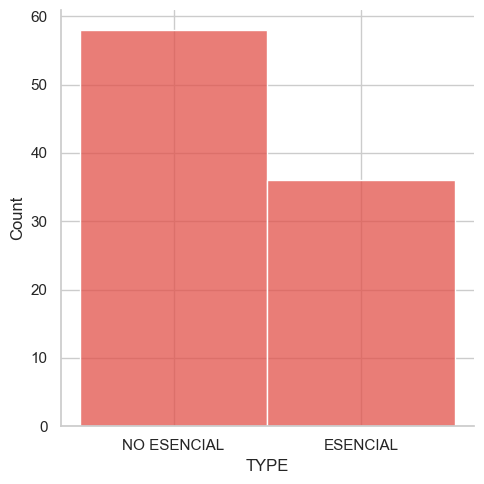

In [165]:
import seaborn as sns
EXPENSES = GASTOS['TYPE']
sns.set_theme(style="whitegrid", palette="Spectral")
sns.displot(EXPENSES, bins=4)

In [166]:
GASTOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     94 non-null     datetime64[ns]
 1   EXPENSE  94 non-null     object        
 2   AMOUNT   94 non-null     float64       
 3   TYPE     94 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.1+ KB


In [167]:
GASTOS = GASTOS.sort_values('DATE', ascending=True)

In [168]:
GASTOS

,DATE,EXPENSE,AMOUNT,TYPE
0,2023-04-01,SNACK,5.50,NO ESENCIAL
1,2023-04-01,TALLER,20.00,ESENCIAL
2,2023-04-02,SNACK,3.50,NO ESENCIAL
3,2023-04-02,OTROS,5.00,ESENCIAL
4,2023-04-02,GAS,10.00,ESENCIAL
...,...,...,...,...
87,2023-06-17,OTROS,20.00,NO ESENCIAL
88,2023-06-17,GAS,20.00,ESENCIAL
89,2023-06-17,SNACK,3.99,NO ESENCIAL
85,2023-06-18,SUPER,18.91,ESENCIAL


In [169]:
GASTOSPORDIA = GASTOS.groupby('DATE').agg({'AMOUNT': 'sum'})
GASTOSPORDIA

,AMOUNT
DATE,
2023-04-01,25.50
2023-04-02,18.50
2023-04-05,308.50
2023-04-06,43.98
2023-04-07,15.20
2023-04-09,11.18
2023-04-10,20.00
2023-04-11,32.09
2023-04-12,33.50


# GRAFICA 2: GASTOS POR DIA EN EL TIEMPO

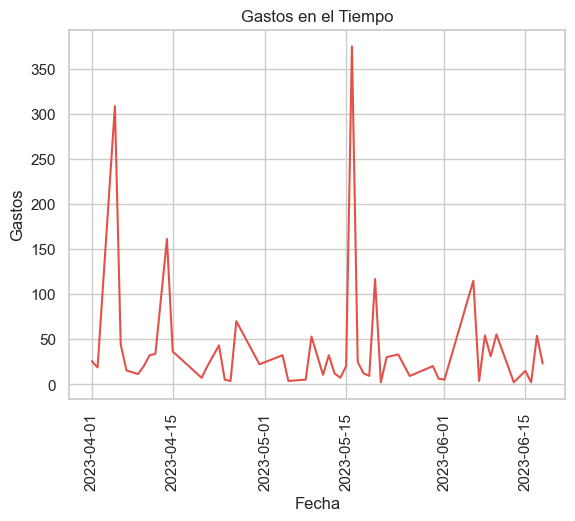

In [170]:
import matplotlib.pyplot as plt
plt.plot(GASTOSPORDIA.index, GASTOSPORDIA['AMOUNT'])

# Personalizar el gráfico
plt.title('Gastos en el Tiempo')
plt.xticks(rotation='vertical')
plt.xlabel('Fecha')
plt.ylabel('Gastos')
plt.style.use('ggplot')
# Mostrar el gráfico
plt.show()


# GRÁFICO 3 = GASTOS POR MES

In [171]:
GASTOSPORMES = GASTOS.groupby(pd.Grouper(key='DATE', freq='M'))['AMOUNT'].sum()

In [172]:
GASTOSPORMES = GASTOSPORMES.to_frame().reset_index() ##Convertiendo a DF para análisis
GASTOSPORMES

,DATE,AMOUNT
0,2023-04-30,875.93
1,2023-05-31,811.79
2,2023-06-30,358.44


In [173]:
import seaborn as sns

In [174]:
#HACER MAPPING DE MESES PARA FACILITAR ANÁLISIS
MESES_MAPPING = {'2023-04-30':'Abril','2023-05-31':'Mayo','2023-06-30':'Junio'}

In [175]:
GASTOSPORMES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    3 non-null      datetime64[ns]
 1   AMOUNT  3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 176.0 bytes


In [176]:
#AGRANDO COLUMNA DE MES
GASTOSPORMES['MS'] = GASTOSPORMES['DATE'].dt.strftime('%B')
GASTOSPORMES

,DATE,AMOUNT,MS
0,2023-04-30,875.93,April
1,2023-05-31,811.79,May
2,2023-06-30,358.44,June


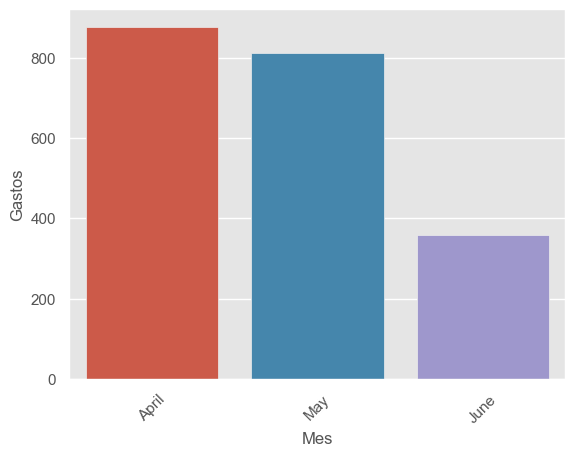

In [177]:
sns.barplot(x='MS', y='AMOUNT', data=GASTOSPORMES)

# Añadir etiquetas a los ejes
plt.xlabel('Mes')
plt.ylabel('Gastos')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

In [178]:
GASTOS.describe()

,AMOUNT
count,94.000000
mean,21.767660
std,46.833612
min,0.990000
25%,3.990000
50%,8.280000
75%,20.000000
max,318.000000


# OTROS ANÁLISIS COMO PROMEDIO Y MODA 


In [179]:
GASTOS['AMOUNT'].mean()


21.767659574468084

In [180]:
GASTOS['EXPENSE'].mode()

0    SNACK
Name: EXPENSE, dtype: object

In [181]:
GASTOS['AMOUNT'].mode()

0    3.5
Name: AMOUNT, dtype: float64

# GRAFICA 4: CHART PIE DE GASTOS

In [182]:
import seaborn as sns

In [251]:
EXPENSES_SUM = GASTOS.groupby(['EXPENSE']).sum(numeric_only=True)
EXPENSES_SUM['AMOUNT']

EXPENSE
CEJAS         16.00
CINE           7.25
COMIDA         4.95
GAS          150.00
GYM           32.09
LUZ          100.00
MATRICULA     12.00
NETFLIX        4.99
OTROS        219.67
PLAN TIGO     21.19
REST.        262.43
SALON         48.00
SHOPPING     409.37
SMARFIT       64.18
SNACK        100.69
SPOTIFY       11.98
SUPER        159.79
TALLER       340.00
TIGO          21.19
UBER          28.65
ZAPATOS       31.74
Name: AMOUNT, dtype: float64

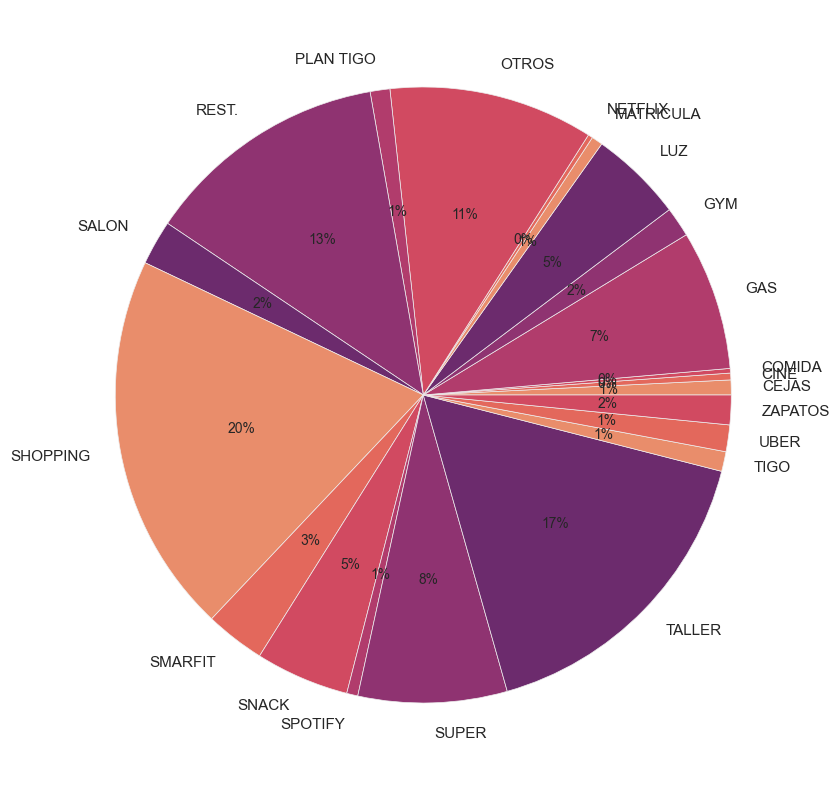

In [184]:
# declaring data
data = EXPENSES_SUM['AMOUNT']
keys = EXPENSES_SUM.index
# define Seaborn color palette to use
palette_color = sns.color_palette('flare')
# plotting data on chart
plt.figure(figsize=(15, 10))
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  # displaying chart
plt.show()

# OTROS DATOS IMPORTANTES

Vamos a realizar el análisis de algunos gastos importantes y luego graficarlos.
Vamos a sacar la frencuencia de gastos: SNACK, SUPER, GAS, REST.
Luego los graficaremos.

In [185]:
GASTOS.describe()

,AMOUNT
count,94.000000
mean,21.767660
std,46.833612
min,0.990000
25%,3.990000
50%,8.280000
75%,20.000000
max,318.000000


In [186]:
GASFILTRO = GASTOS[GASTOS['EXPENSE'] == 'GAS']
FRECUENCIAGAS = GASFILTRO['DATE'].diff()
SNACKFILTRO = GASTOS[GASTOS['EXPENSE'] == 'SNACK']
FRECUENCIASNACK = SNACKFILTRO['DATE'].diff()
SUPERFILTRO = GASTOS[GASTOS['EXPENSE'] == 'SUPER']
FRECUENCIASUPER = SUPERFILTRO['DATE'].diff()

In [187]:
FRECUENCIAGAS

4        NaT
8     4 days
15    4 days
27   11 days
41   24 days
63    7 days
68    8 days
76    9 days
88    9 days
Name: DATE, dtype: timedelta64[ns]

In [188]:
FRECUENCIASUPER

11       NaT
12    1 days
35   32 days
60   15 days
77   16 days
85    9 days
Name: DATE, dtype: timedelta64[ns]

In [189]:
FRECUENCIASNACK

0        NaT
2     1 days
5     3 days
7     1 days
14    3 days
20    5 days
26    6 days
30    5 days
31    1 days
50    9 days
47    3 days
52    3 days
45    3 days
49    2 days
51    1 days
55    4 days
64    1 days
54    0 days
61    2 days
66    2 days
80   12 days
78    1 days
83    5 days
92    2 days
90    1 days
89    1 days
84    1 days
Name: DATE, dtype: timedelta64[ns]

In [190]:
FRECUENCIASNACK.mode()

0   1 days
Name: DATE, dtype: timedelta64[ns]

Como resultado, la moda en la frecuencia de gastar en snack es de 1 día.
Es decir, se gasta en SNACK casi diariamente.

In [191]:
FRECUENCIASUPER.mode()

0    1 days
1    9 days
2   15 days
3   16 days
4   32 days
Name: DATE, dtype: timedelta64[ns]

Podemos deducir que no hay una tendencia definida en los datos en cuanto algasto "SUPER"

In [192]:
mapping = {'ESENCIAL': 1, 'NO ESENCIAL': 0}
GASTOS['TIPO'] = GASTOS['TYPE'].map(mapping)
GASTOS

,DATE,EXPENSE,AMOUNT,TYPE,TIPO
0,2023-04-01,SNACK,5.50,NO ESENCIAL,0
1,2023-04-01,TALLER,20.00,ESENCIAL,1
2,2023-04-02,SNACK,3.50,NO ESENCIAL,0
3,2023-04-02,OTROS,5.00,ESENCIAL,1
4,2023-04-02,GAS,10.00,ESENCIAL,1
...,...,...,...,...,...
87,2023-06-17,OTROS,20.00,NO ESENCIAL,0
88,2023-06-17,GAS,20.00,ESENCIAL,1
89,2023-06-17,SNACK,3.99,NO ESENCIAL,0
85,2023-06-18,SUPER,18.91,ESENCIAL,1


# Gráfico 5: Dispersión Semanal 

In [193]:
#GRAFICO DE DISPERSION PARA EVALUAR TENDENCIAS
FECHAS = WEEKEXPENSES.index
GASTOS_SEMANAL = WEEKEXPENSES['AMOUNT']
FECHAS2 = GASTOS['DATE']
GASTOS_DIARIOS = GASTOS['AMOUNT']

<function matplotlib.pyplot.show(close=None, block=None)>

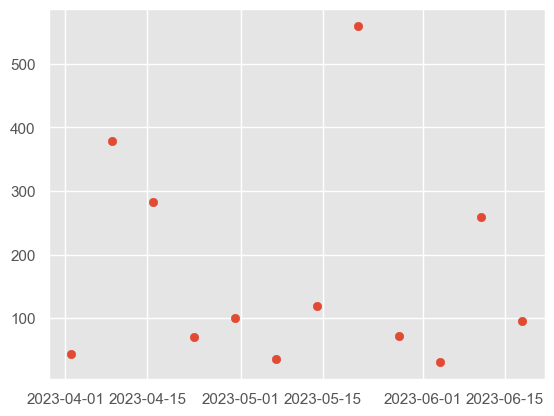

In [194]:
plt.scatter(FECHAS, GASTOS_SEMANAL)
plt.show

# Gráfico 6: Dispersión de Gastos Diarios

<function matplotlib.pyplot.show(close=None, block=None)>

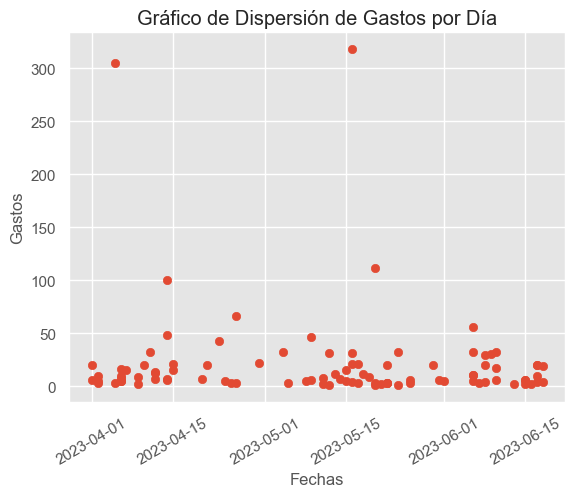

In [195]:
plt.scatter(FECHAS2, GASTOS_DIARIOS)
plt.xticks(rotation=30)
plt.xlabel('Fechas')
plt.ylabel('Gastos')
plt.title('Gráfico de Dispersión de Gastos por Día')
plt.show

NOTAS: Se puede apreciar en la gráfica que los gastos diarios no soprepasan los $50


# Aplicando modelo Simple de Suavizado Exponencial

 Se escogió este modelo ya que nuestros datos tiene algunos valores volátiles o anomalías. Además que carecen de estacionalidad.

In [196]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [197]:
#NUEVO DF QUE USAREMOS PARA MODELO
#DATOS SERÁN UTILIZADOS COMO SEMANA
WEEKEXPENSES = GASTOS.groupby(pd.Grouper(key='DATE', freq='W'))['AMOUNT'].sum()
WEEKEXPENSES = WEEKEXPENSES.to_frame().reset_index() ##Convertiendo a DF para análisis
WEEKEXPENSES = WEEKEXPENSES.sort_values('DATE')
WEEKEXPENSES

,DATE,AMOUNT
0,2023-04-02,44.00
1,2023-04-09,378.86
2,2023-04-16,282.78
3,2023-04-23,70.00
4,2023-04-30,100.29
5,2023-05-07,35.59
6,2023-05-14,118.98
7,2023-05-21,559.27
8,2023-05-28,71.95
9,2023-06-04,31.00


In [198]:
# Extract the expenses as a time series
expenses = pd.Series(WEEKEXPENSES['AMOUNT'].values, index=WEEKEXPENSES['DATE'])
expenses.index.freq = 'W'
expenses

DATE
2023-04-02     44.00
2023-04-09    378.86
2023-04-16    282.78
2023-04-23     70.00
2023-04-30    100.29
2023-05-07     35.59
2023-05-14    118.98
2023-05-21    559.27
2023-05-28     71.95
2023-06-04     31.00
2023-06-11    258.22
2023-06-18     95.22
Freq: W-SUN, dtype: float64

In [199]:
WEEKEXPENSES['AMOUNT'] = pd.to_numeric(WEEKEXPENSES['AMOUNT'], errors='coerce')
WEEKEXPENSES.set_index('DATE', inplace=True)

In [200]:
alpha = 0.2  # Smoothing factor (0 < alpha < 1)
model = SimpleExpSmoothing(expenses)
fitted_model = model.fit(smoothing_level=alpha, optimized=False)


In [201]:
fitted_values = pd.Series(fitted_model.fittedvalues, index=expenses.index)
WEEKEXPENSES['Expenses_smoothed'] = fitted_values
WEEKEXPENSES

,AMOUNT,Expenses_smoothed
DATE,,
2023-04-02,44.00,44.000000
2023-04-09,378.86,44.000000
2023-04-16,282.78,110.972000
2023-04-23,70.00,145.333600
2023-04-30,100.29,130.266880
2023-05-07,35.59,124.271504
2023-05-14,118.98,106.535203
2023-05-21,559.27,109.024163
2023-05-28,71.95,199.073330


In [202]:
## EVALUACION DE MODELO
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = fitted_model.fittedvalues
mae = mean_absolute_error(expenses, predictions)
rmse = mean_squared_error(expenses, predictions, squared=False)

In [203]:
mae

134.89523550668804

In [204]:
rmse

185.63481845618224

In [205]:
errors = abs(expenses - predictions)

# Calcular los errores porcentuales
percentage_errors = (errors / expenses) * 100

# Calcular el MAPE
mape = percentage_errors.mean()

mape

115.29943455172292

In [206]:
## EN CONCLUSION LA PREDICCIÓN DIFIERE DE LOS DATOS REALES POR LO CUAL HAY QUE REALIZAR OTRO MODELO.
alpha2 = 0.5  # Smoothing factor (0 < alpha < 1)
model2 = SimpleExpSmoothing(expenses)
fitted_model2 = model.fit(smoothing_level=alpha2, optimized=False)


In [207]:
fitted_values2 = pd.Series(fitted_model2.fittedvalues, index=expenses.index)
WEEKEXPENSES['Expenses_smoothed2'] = fitted_values2
WEEKEXPENSES

,AMOUNT,Expenses_smoothed,Expenses_smoothed2
DATE,,,
2023-04-02,44.00,44.000000,44.000000
2023-04-09,378.86,44.000000,44.000000
2023-04-16,282.78,110.972000,211.430000
2023-04-23,70.00,145.333600,247.105000
2023-04-30,100.29,130.266880,158.552500
2023-05-07,35.59,124.271504,129.421250
2023-05-14,118.98,106.535203,82.505625
2023-05-21,559.27,109.024163,100.742813
2023-05-28,71.95,199.073330,330.006406


In [208]:
predictions2 = fitted_model2.fittedvalues
mae2 = mean_absolute_error(expenses, predictions2)
rmse2 = mean_squared_error(expenses, predictions2, squared=False)
errors2 = abs(expenses - predictions)
mae2

157.71336425781251

In [209]:
errors2 = abs(expenses - predictions2)

# Calcular los errores porcentuales
percentage_errors2 = (errors / expenses) * 100

# Calcular el MAPE
mape2 = percentage_errors2.mean()

mape2

115.29943455172292

In [210]:
alpha3 = 0.1  # Smoothing factor (0 < alpha < 1)
model3 = SimpleExpSmoothing(expenses)
fitted_model3 = model.fit(smoothing_level=alpha3, optimized=False)

In [211]:
fitted_values3 = pd.Series(fitted_model3.fittedvalues, index=expenses.index)
WEEKEXPENSES['Expenses_smoothed3'] = fitted_values3
WEEKEXPENSES

,AMOUNT,Expenses_smoothed,Expenses_smoothed2,Expenses_smoothed3
DATE,,,,
2023-04-02,44.00,44.000000,44.000000,44.000000
2023-04-09,378.86,44.000000,44.000000,44.000000
2023-04-16,282.78,110.972000,211.430000,77.486000
2023-04-23,70.00,145.333600,247.105000,98.015400
2023-04-30,100.29,130.266880,158.552500,95.213860
2023-05-07,35.59,124.271504,129.421250,95.721474
2023-05-14,118.98,106.535203,82.505625,89.708327
2023-05-21,559.27,109.024163,100.742813,92.635494
2023-05-28,71.95,199.073330,330.006406,139.298945


In [212]:
#EVALUANDO 3ER MODELO
predictions3 = fitted_model3.fittedvalues
mae3 = mean_absolute_error(expenses, predictions3)
rmse3 = mean_squared_error(expenses, predictions3, squared=False)
errors3 = abs(expenses - predictions3)
mae3

122.89811863243118

In [213]:
rmse3

185.35238896027195

In [214]:
errors3 = abs(expenses - predictions3)

# Calcular los errores porcentuales
percentage_errors3 = (errors3 / expenses) * 100

# Calcular el MAPE
mape3 = percentage_errors3.mean()

mape3

83.30875165280365

In [215]:
## EL PORCENTAJE DE ERROR SIGUE SIENDO RELATIVAMENTE ALTO POR LO CUAL SE PUEDE SEGUIR MEJORANDO EL MODELO. 


In [216]:
#COMPARACION VISUAL DE DATOS ORIGINALES Y PREDICHOS.
FECHA_ = WEEKEXPENSES.index
DATOS_ORIGINALES = WEEKEXPENSES['AMOUNT']
DATOS_PREDICCION = WEEKEXPENSES['Expenses_smoothed3']
DATOS_PREDICCION2 = WEEKEXPENSES['Expenses_smoothed']

<function matplotlib.pyplot.show(close=None, block=None)>

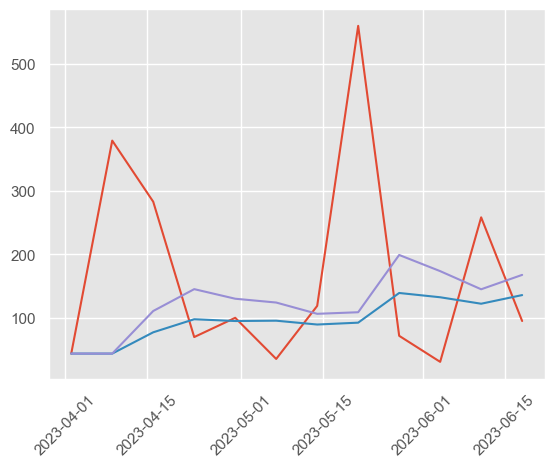

In [217]:
plt.plot(FECHA_, DATOS_ORIGINALES, label='Valores Originales')
plt.plot(FECHA_, DATOS_PREDICCION, label='Valores Predichos')
plt.plot(FECHA_, DATOS_PREDICCION2, label='Valores Predichos2')
plt.xticks(rotation=45)
plt.show

# 2DO MODELO SUAVIZADO EXPONENCIAL SIMPLE 

En este caso utilizaremos datos diarios para tratar de mejorar el modelo.

In [218]:
#NUEVO DF QUE USAREMOS PARA MODELO
#DATOS SERÁN UTILIZADOS COMO SEMANA
DAYEXPENSES = GASTOS.groupby(pd.Grouper(key='DATE', freq='D'))['AMOUNT'].sum()
DAYEXPENSES = DAYEXPENSES.to_frame().reset_index() ##Convertiendo a DF para análisis
DAYEXPENSES = DAYEXPENSES.sort_values('DATE')
DAYEXPENSES



,DATE,AMOUNT
0,2023-04-01,25.50
1,2023-04-02,18.50
2,2023-04-03,0.00
3,2023-04-04,0.00
4,2023-04-05,308.50
...,...,...
74,2023-06-14,0.00
75,2023-06-15,14.70
76,2023-06-16,2.00
77,2023-06-17,53.62


In [219]:
expensesperday = pd.Series(DAYEXPENSES['AMOUNT'].values, index=DAYEXPENSES['DATE'])
expensesperday.index.freq = 'D'
expensesperday

DATE
2023-04-01     25.50
2023-04-02     18.50
2023-04-03      0.00
2023-04-04      0.00
2023-04-05    308.50
               ...  
2023-06-14      0.00
2023-06-15     14.70
2023-06-16      2.00
2023-06-17     53.62
2023-06-18     22.90
Freq: D, Length: 79, dtype: float64

In [220]:
DAYEXPENSES['AMOUNT'] = pd.to_numeric(DAYEXPENSES['AMOUNT'], errors='coerce')
DAYEXPENSES.set_index('DATE', inplace=True)

In [239]:
alpha5 = 0.1  # Smoothing factor (0 < alpha < 1)
model5 = SimpleExpSmoothing(expensesperday)
fitted_model5 = model5.fit(smoothing_level=alpha5, optimized=False)


In [240]:
fitted_values5 = pd.Series(fitted_model5.fittedvalues, index=expensesperday.index)
DAYEXPENSES['Expenses_smoothed'] = fitted_values5
DAYEXPENSES

,AMOUNT,Expenses_smoothed
DATE,,
2023-04-01,25.50,25.500000
2023-04-02,18.50,25.500000
2023-04-03,0.00,24.800000
2023-04-04,0.00,22.320000
2023-04-05,308.50,20.088000
...,...,...
2023-06-14,0.00,20.581520
2023-06-15,14.70,18.523368
2023-06-16,2.00,18.141031


EVALUANDO EL NUEVO MODELO

In [241]:
predictions5 = fitted_model5.fittedvalues
errors5 = abs(expensesperday - predictions5)

# Calcular los errores porcentuales
percentage_errors5 = (errors5 / expensesperday) * 100

# Calcular el MAPE
mape5 = percentage_errors5.mean()

mape5

inf

In [242]:
mae5 = mean_absolute_error(expensesperday, predictions5)
rmse5 = mean_squared_error(expensesperday, predictions5, squared=False)

In [243]:
mae5

31.515937766148397

In [244]:
rmse5

60.46786974741887

# Gráfico 7: Nuevo Modelo con Datos Diarios

In [246]:
#ASIGNANDO VARIABLES PARA GRÁFICA
FECHA_5 = DAYEXPENSES.index
DATOS_ORIGINALES5 = DAYEXPENSES['AMOUNT']
DATOS_PREDICCION5 = DAYEXPENSES['Expenses_smoothed']


<function matplotlib.pyplot.show(close=None, block=None)>

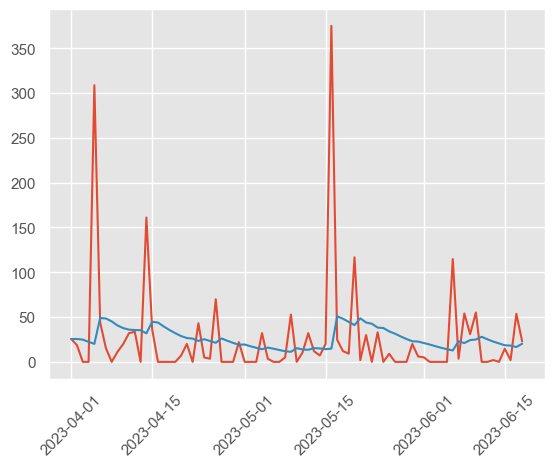

In [247]:
plt.plot(FECHA_5, DATOS_ORIGINALES5, label='Valores Originales')
plt.plot(FECHA_5, DATOS_PREDICCION5, label='Valores Predichos')
plt.xticks(rotation=45)
plt.show